1. Business Understanding
2. Data Mining
3. Data Cleaning
4. Data Exploration
5. Feature Enineering
6. Predictive Modelling
7. Data Visualisation

# Kings County House Prices
An analysis by Vivika Wilde (wilde.vivika@gmail.com).




# Objective

Determine the price drivers on house to find underpriced objects as investment oportunities.


# Set up

In [1]:
%reset -fs
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime
from scipy import stats
import collections
import math

%matplotlib inline
#%matplotlib notebook

data = pd.read_csv(
    '/Users/vivika/nf-may-20/hh-2020-ds1-Project-EDA/King_County_House_prices_dataset.csv'
)

# Variable Names and Descriptions
from project description

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

# Data Types & Missings

In [2]:
kc = data.copy()
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [3]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
kc.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


## Missing Data

In [5]:
missing = pd.DataFrame(kc.isnull().sum(), columns=['Number'])
missing['Percentage'] = round(missing.Number / kc.shape[0] * 100, 1)
missing[missing.Number != 0]

,Number,Percentage
waterfront,2376,11.0
view,63,0.3
yr_renovated,3842,17.8


Of the 21 variables two show incomplete data:
* waterfront is missng 11% of the values
* view is missing 0.3% of the values
* yr_renovated is missing 17.8% of the values

For waterfront, it can be assumed that whenever there is no entry the house will not be at the waterfront. Therefore missing data will be replaced with 0. 
Likewise for we assume no renovation was done whenever there is no valid entry. 
For view the mode is considered whenever data is missing.

In [6]:
kc.waterfront.fillna(0.0, inplace=True)
kc.yr_renovated.fillna(0.0, inplace=True)
kc.view.fillna(kc.view.mode(), inplace=True)

## Price and Log Price

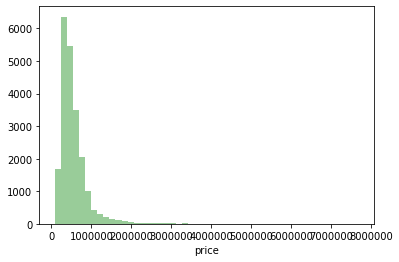

In [7]:
sns.distplot(kc['price'], kde=False, color="g");

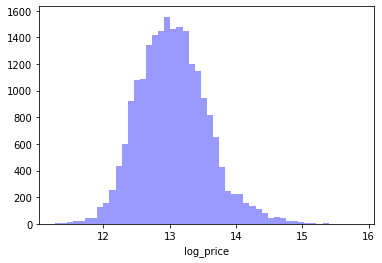

In [8]:
kc['log_price'] = [math.log(float(p)) for p in kc.price]
sns.distplot(kc['log_price'], kde=False, color="b");

As can be seen from the histograms, in contrast to the price itself the logarithm of the price is approximatly normally distributed.

## Building Year and Renovation

The modernisation year and therefore an implied standard can be deducted from building year and the year it was renovated.

In [9]:
# years since last modernisation
kc['modernised'] = datetime.datetime.now().year - kc[[
    'yr_built', 'yr_renovated'
]].max(axis=1)
kc = kc.drop(['yr_built', 'yr_renovated'], axis=1)

## Living space
Because we have the basement size, the size of the house exclunding the basement and the size of the total living area, one of these variables is redundant. The basement size date is corrected using the other two variables and the total living area is removed from the data set.

In [10]:
kc['sqft_basement'] = kc['sqft_living'] - kc['sqft_above']

In [11]:
kc = kc.drop(['id', 'date', 'sqft_living'], axis=1)

## Outliers
Data showing larger irregualities than 10 standard deviations is excluded from the data set to avoid distorted outcomes.

In [12]:
outlier_indicies = list(kc[stats.zscore(kc) > 10].index)
kc.drop(outlier_indicies, inplace=True)

/Users/vivika/opt/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


## Categorial Data

In [13]:
cat = kc.filter(['view', 'waterfront', 'condition', 'grade', 'zipcode'],
                axis=1).astype("category")

## Continuous Data

In [14]:
cont = kc.drop(cat, axis=1)
cont = cont.apply(pd.to_numeric)

### Correlations

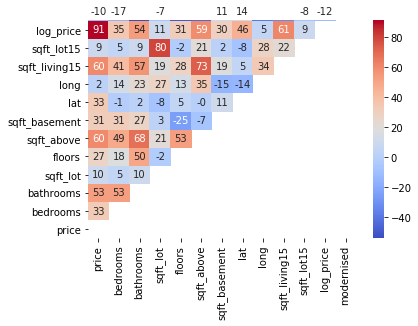

In [15]:
mask = np.triu(cont.corr())
ax = sns.heatmap(round(cont.corr()*100,0)
                 ,annot=True
                 ,mask=mask
                 ,cmap='coolwarm')
ax.set_ylim((0,12))
plt.savefig('figures/correlogram.png')

### Basic Statistics

In [16]:
cont.describe().round()

,price,bedrooms,bathrooms,sqft_lot,floors,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,log_price,modernised
count,21391.0,21391.0,21391.0,21391.0,21391.0,21391.0,21391.0,21391.0,21391.0,21391.0,21391.0,21391.0,21391.0
mean,530601.0,3.0,2.0,13810.0,1.0,1780.0,289.0,48.0,-122.0,1981.0,12031.0,13.0,47.0
std,331780.0,1.0,1.0,29381.0,1.0,815.0,437.0,0.0,0.0,681.0,22360.0,1.0,29.0
min,78000.0,1.0,0.0,520.0,1.0,370.0,0.0,47.0,-123.0,399.0,651.0,11.0,5.0
25%,320000.0,3.0,2.0,5027.0,1.0,1190.0,0.0,47.0,-122.0,1480.0,5100.0,13.0,21.0
50%,450000.0,3.0,2.0,7575.0,2.0,1560.0,0.0,48.0,-122.0,1830.0,7600.0,13.0,43.0
75%,639000.0,4.0,2.0,10521.0,2.0,2200.0,560.0,48.0,-122.0,2350.0,10004.0,13.0,66.0
max,4210000.0,11.0,8.0,426450.0,4.0,9410.0,4130.0,48.0,-121.0,6210.0,275299.0,15.0,120.0


### Boxplots

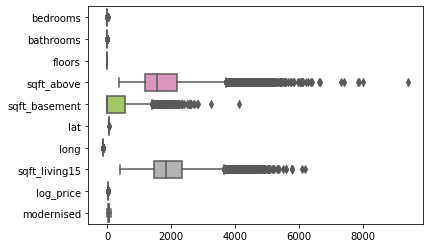

In [17]:
ax = sns.boxplot(data=cont.drop(['price', 'sqft_lot', 'sqft_lot15'], axis=1), orient="h", palette="Set2")

# Features
## Dummies
In order to be able to process the categoria data dummies are created.

In [18]:
dummies = pd.DataFrame()
i_dummies = pd.DataFrame()

for i in cat:
    i_dummies = pd.get_dummies(cat[i], prefix=i, drop_first=True)
    dummies = pd.concat([dummies, i_dummies], axis=1)

kc_dum = pd.concat([cont, dummies], axis=1)


Where there is an excessive amount of variables it will be difficult to view them seperately. Therefore arrays are defined.

In [19]:
cat.nunique()

view           5
waterfront     1
condition      5
grade         11
zipcode       70
dtype: int64

In [20]:
zipcodes = kc_dum.filter(regex='^zipcode', axis=1)
grades = kc_dum.filter(regex='^grade', axis=1)

## Explanatory Variables

In [21]:
X = list(kc_dum)
X.remove('price')
X = [x for x in X if not x.startswith('zipcode')]
X = [x for x in X if not x.startswith('grade')]

rs = []
adj_rs = []

for i in X:
    X1 = kc_dum[i]
    X1 = sm.add_constant(X1)
    y1 = kc_dum.price
    rs.append(sm.OLS(y1, X1).fit().rsquared.round(2))
    adj_rs.append(sm.OLS(y1, X1).fit().rsquared_adj.round(2))

X1 = zipcodes
X1 = sm.add_constant(X1)
y1 = kc_dum.price
rs.append(sm.OLS(y1, X1).fit().rsquared.round(2))
adj_rs.append(sm.OLS(y1, X1).fit().rsquared_adj.round(2))
X.append('zipcodes')

X1 = grades
X1 = sm.add_constant(X1)
y1 = kc_dum.price
rs.append(sm.OLS(y1, X1).fit().rsquared.round(2))
adj_rs.append(sm.OLS(y1, X1).fit().rsquared_adj.round(2))
X.append('grades')

rs_df = pd.DataFrame()
rs_df['explanatory_variable'] = X
rs_df['r_squared'] = rs
rs_df['adjusted_r_squared'] = adj_rs
rs_df = rs_df.sort_values('r_squared', ascending=False)
rs_df

/Users/vivika/opt/anaconda3/envs/nf/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,explanatory_variable,r_squared,adjusted_r_squared
10,log_price,0.84,0.84
21,grades,0.52,0.52
20,zipcodes,0.46,0.46
8,sqft_living15,0.36,0.36
4,sqft_above,0.36,0.36
1,bathrooms,0.28,0.28
0,bedrooms,0.11,0.11
6,lat,0.11,0.11
5,sqft_basement,0.09,0.09
3,floors,0.07,0.07


# Model Creation

## Using all explanatory variables

In [22]:
X1 = kc_dum.copy()
X1.drop('price', axis=1, inplace=True)
X1 = sm.add_constant(X1)
y1 = kc_dum.price
sm.OLS(y1, X1).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     2374.
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        01:23:58   Log-Likelihood:            -2.7567e+05
No. Observations:               21391   AIC:                         5.515e+05
Df Residuals:                   21291   BIC:                         5.523e+05
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.777e+06   3.71e+06     -0.479      0.632   -9.05e+06    5.49e+06
bedrooms      -7342.0683    988.894     -7.425      0.000   -9280.376   -5403.761
bathrooms      3269.4035   1602.800      2.040      0.041     127.794    6411.013
sqft_lot         -0.1721      0.038     -4.569      0.000      -0.246      -0.098
floors        -8091.9784   1918.496     -4.218      0.000   -1.19e+04   -4331.581
sqft_above       36.2957      2.073     17.508      0.000      32.232      40.359
sqft_basement    28.9398      2.228     12.991      0.000      24.573      33.306
lat            -1.01e+05   3.83e+04     -2.637      0.008   -1.76e+05   -2.59e+04
long          -3904.9682   2.75e+04     -0.142      0.887   -5.79e+04    5.01e+04
sqft_living15   -18.4501      1.791    -10.303      0.000     -21.960     -14.940
sqft_lot15       -0.0759      0.050     -1.510      0.131      -0.174       0.023
log_price      5.153e+05   3591.301    143.497      0.000    5.08e+05    5.22e+05
modernised      -64.9429     38.104     -1.704      0.088    -139.629       9.743
view_1.0       3.195e+04   5487.197      5.823      0.000    2.12e+04    4.27e+04
view_2.0       1.912e+04   3379.059      5.659      0.000    1.25e+04    2.57e+04
view_3.0       6.935e+04   4691.785     14.782      0.000    6.02e+04    7.85e+04
view_4.0       1.618e+05   7299.208     22.169      0.000    1.48e+05    1.76e+05
condition_2   -4824.9474   1.97e+04     -0.245      0.807   -4.34e+04    3.38e+04
condition_3    -5.35e+04   1.84e+04     -2.914      0.004   -8.95e+04   -1.75e+04
condition_4   -5.204e+04   1.84e+04     -2.831      0.005   -8.81e+04    -1.6e+04
condition_5   -3.827e+04   1.85e+04     -2.068      0.039   -7.45e+04   -2003.251
grade_4        1.397e+05   9.79e+04      1.427      0.154   -5.22e+04    3.32e+05
grade_5        8.874e+04   9.63e+04      0.921      0.357      -1e+05    2.78e+05
grade_6        2.313e+04   9.61e+04      0.241      0.810   -1.65e+05    2.12e+05
grade_7       -3.217e+04   9.61e+04     -0.335      0.738   -2.21e+05    1.56e+05
grade_8       -5.531e+04   9.62e+04     -0.575      0.565   -2.44e+05    1.33e+05
grade_9       -2.563e+04   9.62e+04     -0.266      0.790   -2.14e+05    1.63e+05
grade_10       6.907e+04   9.63e+04      0.717      0.473    -1.2e+05    2.58e+05
grade_11       2.462e+05   9.64e+04      2.553      0.011    5.72e+04    4.35e+05
grade_12       5.709e+05    9.7e+04      5.885      0.000    3.81e+05    7.61e+05
grade_13        1.17e+06   1.01e+05     11.564      0.000    9.72e+05    1.37e+06
zipcode_98002  2.073e+04   8643.637      2.398      0.016    3787.463    3.77e+04
zipcode_98003 -7755.1189   7723.902     -1.004      0.315   -2.29e+04    7384.311
zipcode_98004  2.188e+05   1.46e+04     15.006      0.000     1.9e+05    2.47e+05
zipcode_98005 -2.733e+04   1.53e+04     -1.791   

The model show good r-squared values, however some variables show insignificance (high p-values).

## Removing insignificant variables

In [23]:
y2 = kc_dum.price
selected_features = list(kc_dum)
selected_features.remove('price')
pmax = 1
removed_features = []

while (len(selected_features)>0):
    p = []
    X2 = kc_dum[selected_features]
    X2 = sm.add_constant(X2)
    model = sm.OLS(y2,X2).fit()
    p = pd.Series(model.pvalues.values[1:],index = selected_features)
    pmax = max(p)
    p_max_feature = p.idxmax()
    if(pmax>0.05):
        selected_features.remove(p_max_feature)
        removed_features.append(p_max_feature)
    else:
        break

print(removed_features)


['zipcode_98199', 'zipcode_98198', 'zipcode_98178', 'zipcode_98033', 'grade_6', 'condition_2', 'long', 'zipcode_98188', 'zipcode_98148', 'zipcode_98023', 'zipcode_98003', 'zipcode_98031', 'zipcode_98055', 'zipcode_98146', 'zipcode_98030', 'sqft_lot15', 'modernised', 'zipcode_98024', 'zipcode_98014', 'zipcode_98106', 'zipcode_98019', 'zipcode_98133', 'zipcode_98155', 'zipcode_98177', 'zipcode_98122']


As some of the dummies were removed due to isignificance, the entire group has to be taken out. 

In [24]:
selected_features = [x for x in selected_features if not x.startswith('zipcode')]
selected_features = [x for x in selected_features if not x.startswith('grade')]

X3 = kc_dum[selected_features]
X3 = sm.add_constant(X3)
y3 = kc_dum.price
sm.OLS(y3, X3).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     8146.
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        01:24:01   Log-Likelihood:            -2.8132e+05
No. Observations:               21391   AIC:                         5.627e+05
Df Residuals:                   21374   BIC:                         5.628e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.197e+06   3.55e+05      6.193      0.000     1.5e+06    2.89e+06
bedrooms       -2.19e+04   1223.113    -17.902      0.000   -2.43e+04   -1.95e+04
bathrooms     -8336.8408   1903.281     -4.380      0.000   -1.21e+04   -4606.267
sqft_lot         -0.3991      0.030    -13.148      0.000      -0.459      -0.340
floors         -3.12e+04   2182.517    -14.294      0.000   -3.55e+04   -2.69e+04
sqft_above       76.5635      2.290     33.428      0.000      72.074      81.053
sqft_basement    48.8495      2.788     17.520      0.000      43.384      54.314
lat           -1.882e+05   7896.015    -23.834      0.000   -2.04e+05   -1.73e+05
sqft_living15   -21.8646      2.068    -10.573      0.000     -25.918     -17.811
log_price      5.684e+05   3040.250    186.973      0.000    5.62e+05    5.74e+05
view_1.0       3.373e+04   7029.388      4.799      0.000       2e+04    4.75e+04
view_2.0        1.85e+04   4284.639      4.318      0.000    1.01e+04    2.69e+04
view_3.0       6.625e+04   5957.193     11.122      0.000    5.46e+04    7.79e+04
view_4.0       1.775e+05   9267.524     19.153      0.000    1.59e+05    1.96e+05
condition_3   -9.813e+04   9082.078    -10.805      0.000   -1.16e+05   -8.03e+04
condition_4   -9.683e+04   9157.098    -10.575      0.000   -1.15e+05   -7.89e+04
condition_5   -8.755e+04   9550.388     -9.167      0.000   -1.06e+05   -6.88e+04
==============================================================================
Omnibus:                    21400.427   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1882565.023
Skew:                           4.791   Prob(JB):                         0.00
Kurtosis:                      47.948   Cond. No.                     1.35e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Log Price

In [25]:
y2 = kc_dum.log_price
selected_features = list(kc_dum)
selected_features.remove('price')
selected_features.remove('log_price')
pmax = 1
removed_features = []

while (len(selected_features)>0):
    p = []
    X2 = kc_dum[selected_features]
    X2 = sm.add_constant(X2)
    model = sm.OLS(y2,X2).fit()
    p = pd.Series(model.pvalues.values[1:],index = selected_features)
    pmax = max(p)
    p_max_feature = p.idxmax()
    if(pmax>0.05):
        selected_features.remove(p_max_feature)
        removed_features.append(p_max_feature)
    else:
        break

print(removed_features)

['zipcode_98002', 'grade_10', 'zipcode_98198', 'grade_12', 'zipcode_98003', 'bedrooms', 'zipcode_98188', 'grade_11']


In [26]:
selected_features = [x for x in selected_features if not x.startswith('zipcode')]
selected_features = [x for x in selected_features if not x.startswith('grade')]

X3 = kc_dum[selected_features]
X3 = sm.add_constant(X3)
y3 = kc_dum.log_price
model = sm.OLS(y3, X3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     2949.
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        01:24:03   Log-Likelihood:                -2845.4
No. Observations:               21391   AIC:                             5729.
Df Residuals:                   21372   BIC:                             5880.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -88.6214      2.063    -42.963      0.000     -92.665     -84.578
bathrooms         0.0758      0.004     17.032      0.000       0.067       0.085
sqft_lot       8.003e-07   1.07e-07      7.450      0.000     5.9e-07    1.01e-06
floors            0.0870      0.005     17.558      0.000       0.077       0.097
sqft_above        0.0002   4.58e-06     50.737      0.000       0.000       0.000
sqft_basement     0.0002   5.84e-06     34.168      0.000       0.000       0.000
lat               1.5068      0.014    105.722      0.000       1.479       1.535
long             -0.2327      0.016    -14.274      0.000      -0.265      -0.201
sqft_living15     0.0002   4.59e-06     37.676      0.000       0.000       0.000
sqft_lot15    -6.458e-07   1.41e-07     -4.574      0.000   -9.23e-07   -3.69e-07
modernised        0.0015   9.56e-05     16.116      0.000       0.001       0.002
view_1.0          0.1877      0.016     12.044      0.000       0.157       0.218
view_2.0          0.1526      0.009     16.094      0.000       0.134       0.171
view_3.0          0.2243      0.013     17.054      0.000       0.199       0.250
view_4.0          0.3018      0.020     14.736      0.000       0.262       0.342
condition_2       0.1701      0.057      3.008      0.003       0.059       0.281
condition_3       0.3362      0.052      6.407      0.000       0.233       0.439
condition_4       0.4020      0.052      7.660      0.000       0.299       0.505
condition_5       0.4686      0.053      8.876      0.000       0.365       0.572
==============================================================================
Omnibus:                      348.587   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              694.985
Skew:                           0.019   Prob(JB):                    1.22e-151
Kurtosis:                       3.882   Cond. No.                     4.32e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.32e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Results

In [27]:
X3['valued_at'] = model.predict(X3).round(2)
X3['valued_at'] = [math.exp(float(p)) for p in X3['valued_at']]

result = data.join(X3['valued_at'])
result['valuation_deviation_abs'] = (result['valued_at'] - result['price']).round(2)
result['valuation_deviation_pct'] = (result['valuation_deviation_abs']/result['price']*100).round(2)
result.sort_values(by = 'valuation_deviation_pct', ascending=False).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,valued_at,valuation_deviation_abs,valuation_deviation_pct
12764,1225069038,5/5/2014,2280000.0,7,8.00,13540,307752,3.0,0.0,4.0,...,1999,0.0,98053,47.6675,-121.986,4850,217800,2.616675e+07,23886747.94,1047.66
12539,1049010620,5/13/2014,90000.0,2,1.00,790,2640,1.0,NaN,0.0,...,1973,NaN,98034,47.7351,-122.178,1310,2064,3.343688e+05,244368.85,271.52
18453,7999600180,5/29/2014,83000.0,2,1.00,900,8580,1.0,0.0,0.0,...,1918,0.0,98168,47.4727,-122.270,2060,6533,2.936078e+05,210607.76,253.74
326,3530210260,10/27/2014,274975.0,3,2.50,3030,45004,2.0,0.0,0.0,...,1987,0.0,98077,47.7721,-122.093,3080,35781,9.555095e+05,680534.51,247.49
4020,9175600025,10/7/2014,800000.0,7,6.75,7480,41664,2.0,0.0,2.0,...,1953,NaN,98166,47.4643,-122.368,2810,33190,2.703344e+06,1903343.78,237.92
21034,2424059170,2/19/2015,900000.0,5,6.00,7120,40806,2.0,0.0,4.0,...,2007,0.0,98006,47.5451,-122.114,3440,36859,3.017683e+06,2117683.37,235.30
7985,2734100835,3/3/2015,90000.0,1,1.00,780,4000,1.0,0.0,0.0,...,1905,NaN,98108,47.5424,-122.321,1150,4000,2.792883e+05,189288.34,210.32
2711,7851980260,7/30/2014,1110000.0,5,3.50,7350,12231,2.0,0.0,4.0,...,2001,0.0,98065,47.5373,-121.865,5380,12587,3.368574e+06,2258573.77,203.48
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0.0,0.0,...,1954,0.0,98146,47.4987,-122.341,1140,11250,2.477065e+05,165706.54,202.08
3763,1523049188,4/30/2015,84000.0,2,1.00,700,20130,1.0,0.0,0.0,...,1949,0.0,98168,47.4752,-122.271,1490,18630,2.428016e+05,158801.62,189.05


In [28]:
result.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'valued_at',
       'valuation_deviation_abs', 'valuation_deviation_pct'],
      dtype='object')

In [38]:
recs = result[['id', 'price', 'valued_at', 'valuation_deviation_abs', 'valuation_deviation_pct']]
recs = recs.sort_values(by = 'valuation_deviation_pct', ascending=False)[1:11].round()

recs

,id,price,valued_at,valuation_deviation_abs,valuation_deviation_pct
12539,1049010620,90000.0,334369.0,244369.0,272.0
18453,7999600180,83000.0,293608.0,210608.0,254.0
326,3530210260,274975.0,955510.0,680535.0,247.0
4020,9175600025,800000.0,2703344.0,1903344.0,238.0
21034,2424059170,900000.0,3017683.0,2117683.0,235.0
7985,2734100835,90000.0,279288.0,189288.0,210.0
2711,7851980260,1110000.0,3368574.0,2258574.0,203.0
8267,3883800011,82000.0,247707.0,165707.0,202.0
3763,1523049188,84000.0,242802.0,158802.0,189.0
18318,9272202260,130000.0,373249.0,243249.0,187.0
